In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Indian_Kids_Screen_Time.csv")

In [3]:
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [5]:
df.isnull().sum()[df.isnull().sum()>0]

Health_Impacts    3218
dtype: int64

In [6]:
(df.isnull().sum() / len(df)) * 100


Age                                   0.000000
Gender                                0.000000
Avg_Daily_Screen_Time_hr              0.000000
Primary_Device                        0.000000
Exceeded_Recommended_Limit            0.000000
Educational_to_Recreational_Ratio     0.000000
Health_Impacts                       33.134267
Urban_or_Rural                        0.000000
dtype: float64

In [14]:
print(df.shape)        
print(df.columns)      
print(df.info())       


(9712, 8)
Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64

In [15]:
print(df.describe())


               Age  Avg_Daily_Screen_Time_hr  \
count  9712.000000               9712.000000   
mean     12.979201                  4.352837   
std       3.162437                  1.718232   
min       8.000000                  0.000000   
25%      10.000000                  3.410000   
50%      13.000000                  4.440000   
75%      16.000000                  5.380000   
max      18.000000                 13.890000   

       Educational_to_Recreational_Ratio  
count                        9712.000000  
mean                            0.427226  
std                             0.073221  
min                             0.300000  
25%                             0.370000  
50%                             0.430000  
75%                             0.480000  
max                             0.600000  


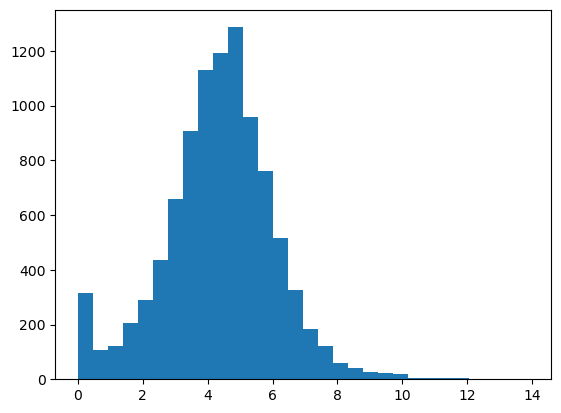

In [16]:
plt.hist(df["Avg_Daily_Screen_Time_hr"], bins=30)
plt.show()


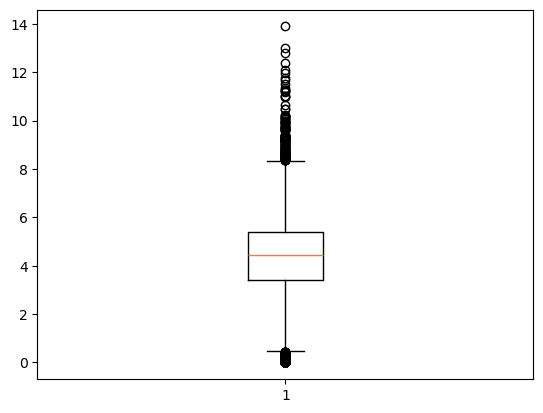

In [17]:
plt.boxplot(df["Avg_Daily_Screen_Time_hr"])
plt.show()


In [18]:
df["Gender"].value_counts()
df["Urban_or_Rural"].value_counts()


Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64

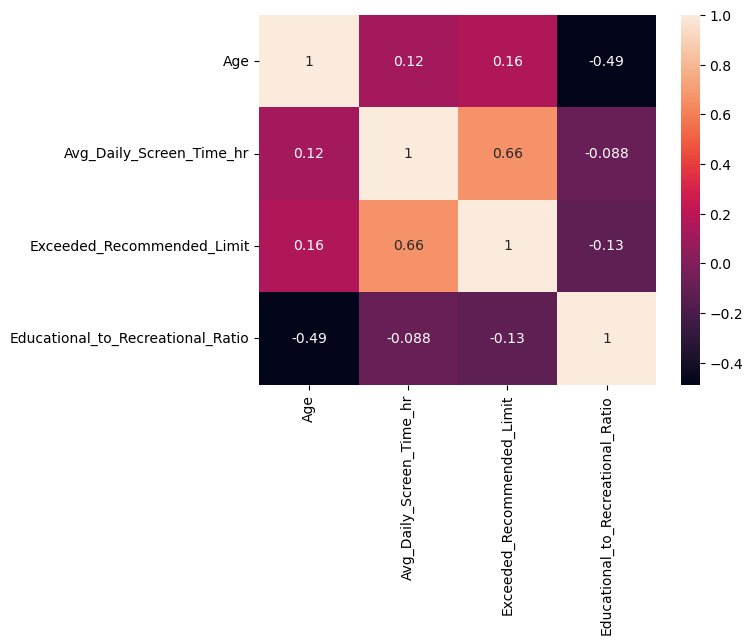

In [19]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


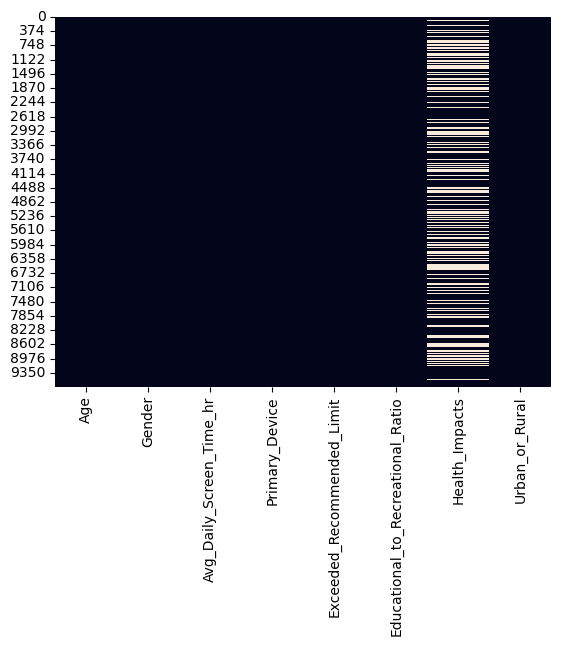

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()


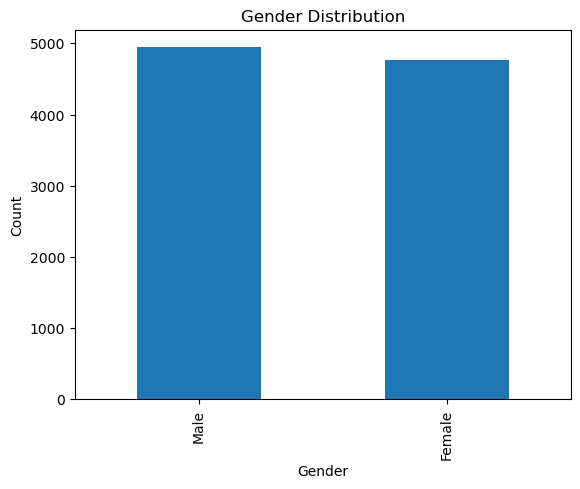

In [10]:
plt.figure()
df["Gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


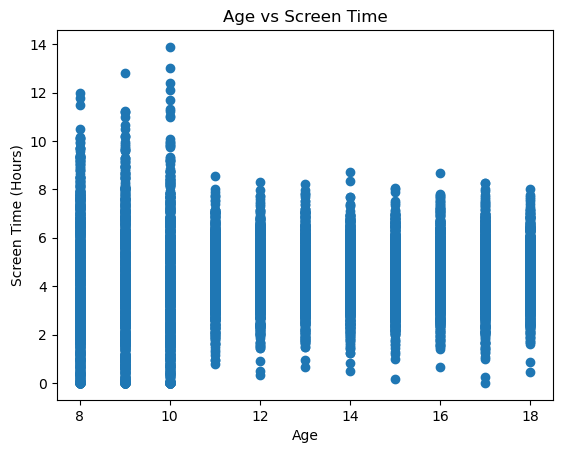

In [11]:
plt.figure()
plt.scatter(df["Age"], df["Avg_Daily_Screen_Time_hr"])
plt.title("Age vs Screen Time")
plt.xlabel("Age")
plt.ylabel("Screen Time (Hours)")
plt.show()


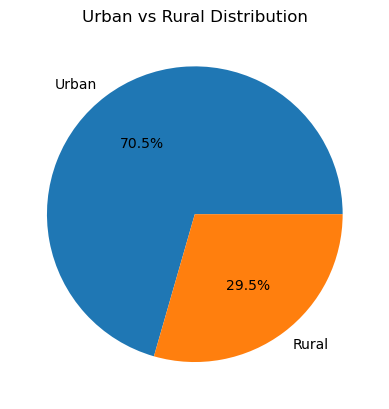

In [12]:
plt.figure()
df["Urban_or_Rural"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Urban vs Rural Distribution")
plt.ylabel("")
plt.show()


In [21]:
Q1 = df["Avg_Daily_Screen_Time_hr"].quantile(0.25)
Q3 = df["Avg_Daily_Screen_Time_hr"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df[(df["Avg_Daily_Screen_Time_hr"] < lower_bound) | 
              (df["Avg_Daily_Screen_Time_hr"] > upper_bound)]

print("Number of Outliers:", len(outliers))


Lower Bound: 0.4550000000000005
Upper Bound: 8.334999999999999
Number of Outliers: 448
